# Project: TMDb Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, we investigate a data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. We want to know what properties are associated with movies that have high revenues.

In [1]:
# Import modules that may be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
# Load and read CSV file and display the first 5 rows of the dataframe
df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Show the data types of each column and the shape of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Show the stat measures of each column in the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

#### Drop unnecessary columns: since we are only interested in three main properties that associated with movies' revenue, we'll drop the rest unnecessary columns.

In [5]:
# Drop unnecessary columns
df.drop(["imdb_id","director","cast","homepage","tagline","keywords","overview","genres","production_companies","release_date"],axis=1,inplace=True)

#### Drop duplicated rows: there is one row that contain dulicated entry, we'll need to drop it from the dataset.

In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

#### Only keep the rows with non-zero adjusted revenue: there are a lot of rows with zero adjusted revenue, we'll need to drop them from the dataset.

In [7]:
# Drop zero adjusted revenue
df=df[df.revenue_adj!=0.0]

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Does movie with higher adjusted budget have higher adjusted revenue?

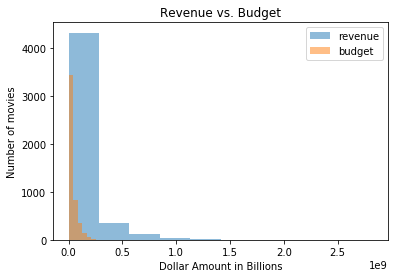

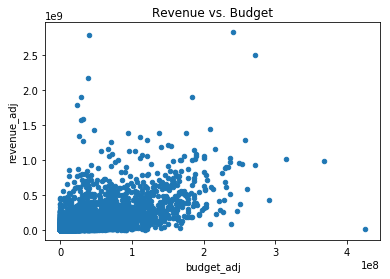

In [8]:
# Plot adjusted revenue and budget in histogram 
ax=df.revenue_adj.plot(kind="hist",label="revenue",alpha=0.5,title="Revenue vs. Budget")
ax=df.budget_adj.plot(kind="hist",label="budget",alpha=0.5)
ax.set_xlabel("Dollar Amount in Billions")
ax.set_ylabel("Number of movies")
plt.legend()
# Create a function for plotting scatter plots
def scatter_plot(df,X,Y,Title):
    df.plot(x=X,y=Y,kind="scatter",title=Title)

# Plot adjusted revenue and budget in scatter plot 
scatter_plot(df,"budget_adj","revenue_adj","Revenue vs. Budget")

Adjusted revenue shares a similar distribution with adjusted budget. Higher adjusted budget movies seem to have higher adjusted revenue in the scatter plot.

### Research Question 2: Does movie with higher popularity have higher adjusted revenue?

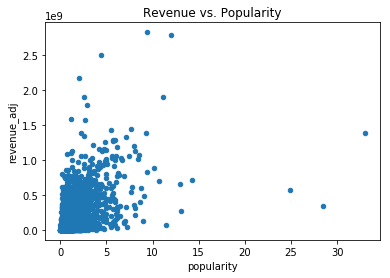

In [9]:
# Plot popularity and adjusted revenue in scatter plot
scatter_plot(df,"popularity","revenue_adj","Revenue vs. Popularity")

More popular movies seem to have higher adjusted revenue.

### Research Question 3: Does movie with higher average vote have higher adjusted revenue?

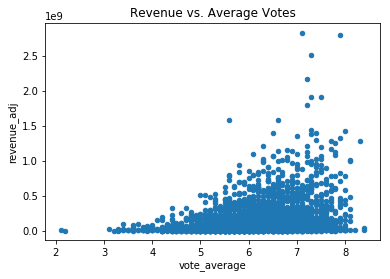

In [10]:
# Plot average votes and adjusted revenue in scatter plot
scatter_plot(df,"vote_average","revenue_adj","Revenue vs. Average Votes")

Higher average vote movies seem to have higher adjusted revenue

<a id='conclusions'></a>
## Conclusions

### Research Conclusion 1: Movies with higher adjusted budget tend to have higher adjusted revenue.
> From the histogram, we can see the ditribution of adjusted budget is similar to that of adjusted revenue, skewed to the right. In the scatter plot, lower adjusted budget movies tend to have lower adjusted revenue, higher adjusted budget movies tend to have higher adjusted revenue.

### Research Conclusion 2: Movie with higher popularity tend to have higher adjusted revenue.
> In the scatter plot, less popular movies tend to have lower adjusted revenue, more popular movies tend to have higher adjusted revenue.

### Research Conclusion 3: Movie with higher average vote tend to have higher adjusted revenue.
> In the scatter plot, lower average vote movies tend to have lower adjusted revenue, higher average vote movies tend to have higher adjusted revenue.

### Limitations: We didn't run any regretion model or any tests on the variables that we are interested in, so the conclusions are simply based on the visualization charts of the sample data.



## Submitting Project 

In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0